# Part 2
# 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data
   

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# string
path =r'/Users/juliapetke/Desktop/Career Foundry/Instacart Basket Analysis'

In [8]:
# Import most up-to-date project data
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

# 2.  create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

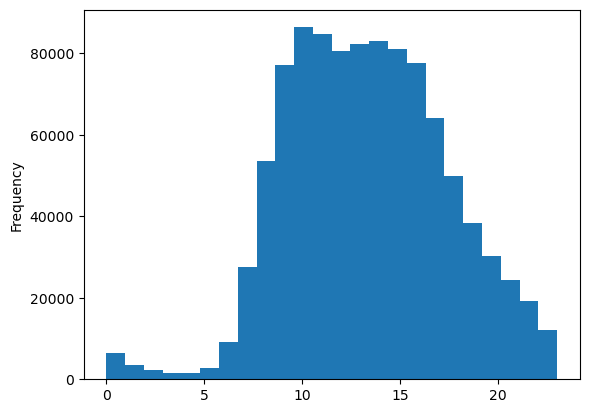

In [13]:
hist = instacart['order_time_of_day'].plot.hist(bins = 24)

Observations:
Peak Hours: The majority of orders are concentrated between 8 AM and 6 PM, with the highest frequency observed around 10-11 AM. This suggests that customers are most active in placing orders during mid-morning to early afternoon.
Off-Peak Hours: There's a noticeable drop in order frequency before 7 AM and after 8 PM, indicating lower customer activity during these hours. The least number of orders are placed during the late night to early morning hours, around 1 AM to 5 AM.
Distribution: The distribution is fairly symmetric, with a clear peak in the middle of the day and a gradual decline as it moves towards the late evening and early morning.

# 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [31]:
# Use groupby and transform() functions with np.max argument to determine maximum order number for each user
instacart['max_order'] = instacart.groupby(['user_id'])['order_number'].transform(np.max)

/var/folders/zd/kwmllg996knd4mqrwq8n_vf80000gp/T/ipykernel_69192/520177114.py:2: FutureWarning: The provided callable <function max at 0x10408fce0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  instacart['max_order'] = instacart.groupby(['user_id'])['order_number'].transform(np.max)


In [33]:
# Use loc function to make loyalty flag column with given criteria
instacart.loc[instacart['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [35]:
instacart.loc[(instacart['max_order'] <= 40) & (instacart['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [37]:
instacart.loc[instacart['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [39]:
instacart.dtypes

product_id                   int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
order_id                     int64
user_id                     object
order_number                 int64
orders_day_of_week           int64
order_time_of_day            int64
days_since_prior_order     float64
add_to_cart_order            int64
reordered                    int64
merge_indicator           category
price_range                 object
busiest_day                 object
slowest_days                object
busiest_period_of_day       object
average_spend              float64
spender_flag                object
customer_frequency         float64
frequency_flag              object
first_name                  object
surname                     object
gender                      object
state                       object
age                          int64
date_joined                 object
n_dependants        

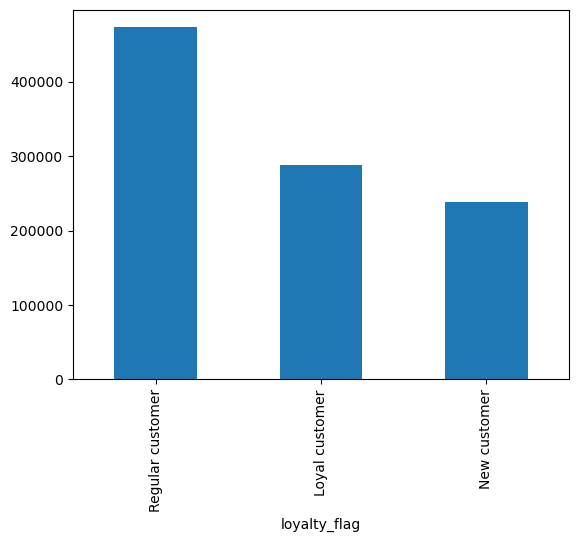

In [41]:
bar = instacart['loyalty_flag'].value_counts().plot.bar()

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [44]:
# Create a random sample by generating a seed
np.random.seed(4)

In [46]:
# Create a dev list based on the data split we want (70/30)
dev = np.random.rand(len(instacart)) <= 0.7

In [48]:
# Split the dataframe into two samples
big = instacart[dev]
small = instacart[~dev]

In [50]:
# Compare the dataframe length to the sum of the big and small samples
len(instacart)

1000000

In [52]:
len(big) + len(small)

1000000

In [107]:
# Reduce the samples to only the columns needed
instacart_1 = small [['orders_day_of_week','prices']]

In [109]:
# Check if the subset
instacart_1.head(5)

,orders_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8


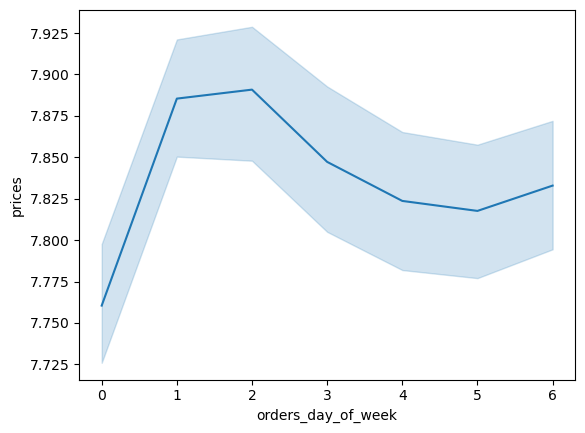

In [111]:
# Create a line chart
line = sns.lineplot(data = instacart_1, x = 'orders_day_of_week',y = 'prices')

In [54]:
# Reduce the samples to only the columns needed
instacart_2 = small [['order_time_of_day','prices']]

In [56]:
# Check if the subset
instacart_2.head(5)

,order_time_of_day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8


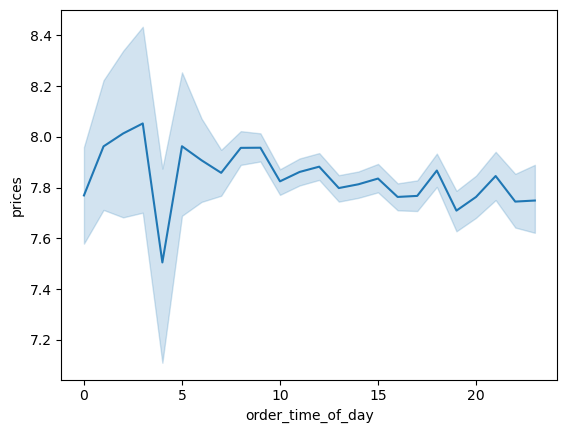

In [58]:
# Create a line chart
line = sns.lineplot(data = instacart_2, x = 'order_time_of_day',y = 'prices')

# 6.  determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:


In [61]:
# Reduce  sample to only the columns needed
instacart_3 = small [['age','n_dependants']]

In [63]:
# Check if the subset 
instacart_3.head(5)

,age,n_dependants
0,81,1
2,66,2
3,40,3
6,20,3
10,61,1


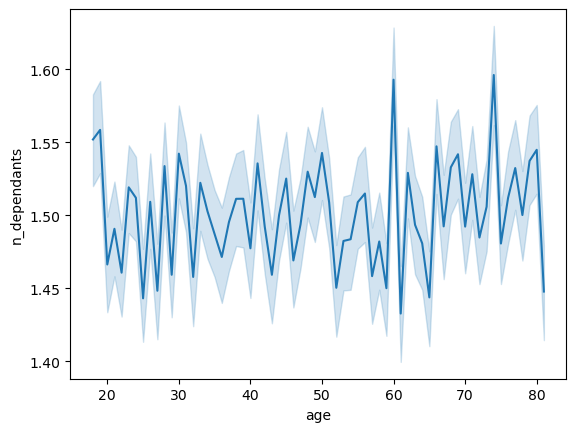

In [65]:
# Create a line chart
line_2 = sns.lineplot(data = instacart_3, x = 'age',y = 'n_dependants')

There are no distinct trends suggesting a strong relationship between age and the number of dependents; for instance, the line doesn't consistently rise or fall with increasing age.

# 7. explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [69]:
# Reduce  sample to only the columns needed
instacart_4 = small [['age','income']]

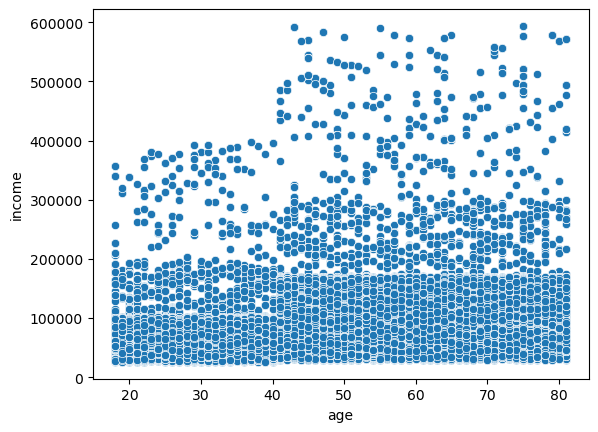

In [71]:
# Create a scatterplot
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = instacart_4)

The scatterplot suggests that while there isn't a strong direct relationship between age and income, there is a tendency for income variability to increase with age, especially after age 40. This might indicate that income potential can grow with age, but it varies widely among individuals.

# 8. Export your visualizations as “.png” files in your relevant project folder.

In [77]:
# Exporting the hist chart
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_frequency.png'))

In [79]:
# Exporting the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_distribution.png'))

In [113]:
# Exporting the line chart 1
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_day_of_week.png'))

In [ ]:
# Exporting the line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'change_in_price_over_time_of_the_day.png'))

In [85]:
# Exporting the line chart 2
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_n_dependants.png'))

In [87]:
# Exporting the scatter plot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'change_in_spending_power_over_age.png'))